In [1]:
import nilearn as nil
from nilearn import plotting
import nibabel as nib
import glob
import os

/home/orco/anaconda3/envs/ich_python/lib/python3.9/site-packages/nilearn/datasets/__init__.py:93: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


In [79]:
html_begin='''
<html>
<body>
'''

html_end='''
</body>
</html>'''

In [80]:
sub = '/media/raid/orco/data/ICH/sub-0023/ses-01/anat/sub-0023_ses-01_space-native_desc-CT.nii.gz'
os.path.isfile(sub)

True

In [81]:
def sub2roi(i):
    return i.replace('/ICH/', '/ICH/derivatives/groundtruth_ICH_IVH_PHE_masks/').replace('_space-native_desc-CT.nii.gz', '_space-native_desc-fusion-ICH-PHE-IVH_mask.nii.gz')

In [82]:
def thres_ct(ct_fil, vmin=0, vmax=100):
    import nibabel as nib
    import numpy as np
    ct_nii = nib.load(ct_fil)
    ct_arr = ct_nii.get_fdata()
    ct_narr = np.where((ct_arr >=vmin) & (ct_arr <=vmax), ct_arr,0)
    return nib.Nifti1Image(ct_narr, ct_nii.affine)

In [83]:
def sub2info(i):
    return i.split('/')[-4], i.split('/')[-3]

In [91]:
def gen_imgs(l):
    if not l is list:
        l = [l]
        
    if not os.path.isdir('./imgs'):
        os.makedirs('./imgs')
        
    l_info = [sub2info(i) for i in l]
    outs = []
    errors = []
    try:
        for info,ct in zip(l_info,l):
            anat_nii = thres_ct(ct)
            roi_file = sub2roi(ct)
            out_roi='./imgs/roi_{}_{}.png'.format(info[0], info[1])
            out_anat='./imgs/anat_{}_{}.png'.format(info[0], info[1])
            plotting.plot_roi(roi_file, anat_nii, display_mode='z', 
                              cut_coords=tuple(range(-770,-750,4)),alpha=0.2, 
                              output_file=out_roi)
            plotting.plot_anat(anat_nii, dim=0, display_mode='z', 
                               cut_coords=tuple(range(-770,-750,4)),
                              output_file=out_anat)
            outs.append({'sub':info[0], 'ses':info[1], 'roi':out_roi, 'anat':out_anat})
    except:
        errors.append({'sub':info[0], 'ses':info[1]})
    return outs, errors

In [93]:
def subs2html(subs):
    outs, errors = gen_imgs(subs)
    with open('gallery.html', 'w') as html:
        html.write(html_begin)
        for i in outs:
            html.write('<h2>{} {}</h2>'.format(i['sub'], i['ses']))
            html.write('<img src="{anat}" alt="{anat}"></img>'.format(anat=i['anat']))
            html.write('<img src="{roi}" alt="{roi}"></img>'.format(roi=i['roi']))
        html.write(html_end)

In [94]:
subs2html(sub)

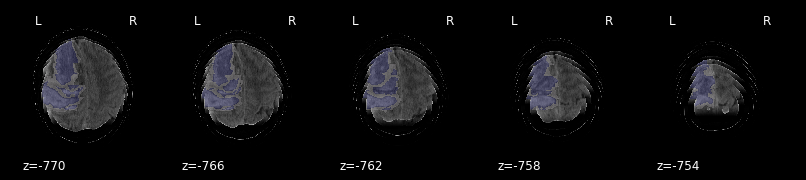

In [77]:
plotting.plot_roi(sub2roi(sub), thres_ct(sub), display_mode='z', cut_coords=tuple(range(-770,-750,4)),alpha=0.2)#, view_type='contours')

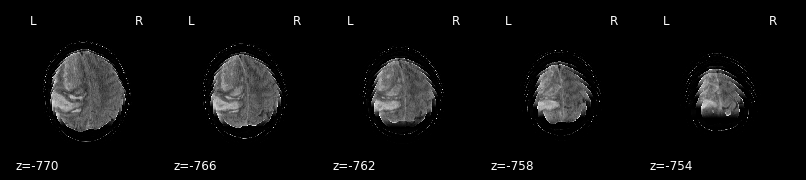

In [76]:
plotting.plot_anat(thres_ct(sub,0,100), dim=0, display_mode='z', cut_coords=tuple(range(-770,-750,4)))#, view_type='contours')